In [48]:
# Import all related libraries
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [49]:
data = pd.read_csv("uberdrivers.csv")
data.head(5)


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [50]:
# delete last columns of this data .
data = data.drop(data.index[len(data)-1])

In [51]:
data.keys()

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [53]:
data.shape

(1155, 7)

In [54]:
# Replacing missing values with purpose equals to "other"
data["PURPOSE*"].replace(np.nan,"other",inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [55]:
data["PURPOSE*"].value_counts()

other              502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

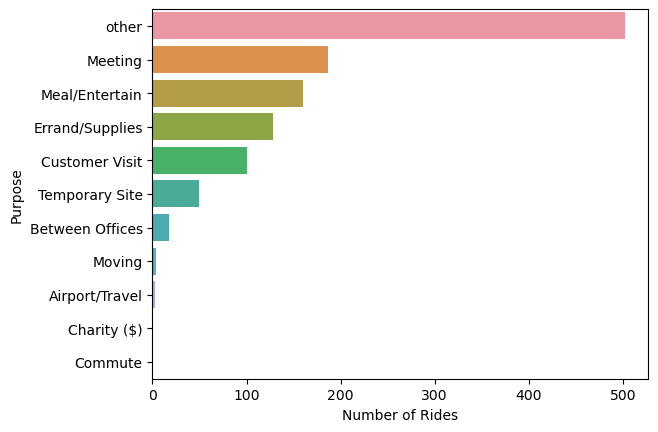

In [56]:
#creating a dataframe containing type of purpose and the number of rides associated with each purpose
ride_count = data['PURPOSE*'].value_counts().tolist()
ride_purpose= data['PURPOSE*'].value_counts().index.tolist()
ride_info = list(zip(ride_purpose,ride_count))
ride_info = pd.DataFrame(ride_info,columns=['PURPOSE','COUNT'])

ax = sns.barplot(x='COUNT',y='PURPOSE',data=ride_info,order=ride_info['PURPOSE'].tolist())
ax.set(xlabel='Number of Rides', ylabel='Purpose')
plt.show()

In [57]:
data["CATEGORY*"].value_counts()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

In [58]:
ride_summary=data.groupby("PURPOSE*").mean()
ride_summary

,MILES*
PURPOSE*,
Airport/Travel,5.500000
Between Offices,10.944444
Charity ($),15.100000
Commute,180.200000
Customer Visit,20.688119
Errand/Supplies,3.968750
Meal/Entertain,5.698125
Meeting,15.247594
Moving,4.550000


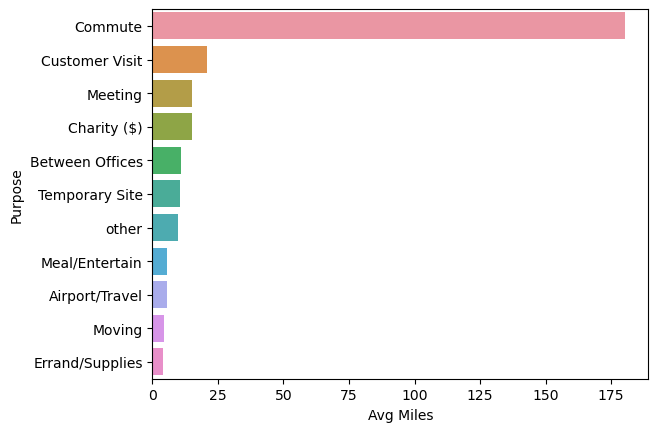

In [59]:
ride_summary["PURPOSE*"]=ride_summary.index.tolist()
ax = sns.barplot(x="MILES*",y="PURPOSE*",data=ride_summary,order=ride_summary.sort_values("MILES*",ascending=False)["PURPOSE*"].tolist())
ax.set(xlabel="Avg Miles",ylabel="Purpose")
plt.show()

In [60]:
start_list = [info.split(" ") for info in data["START_DATE*"].tolist()]
stop_list = [info.split(" ") for info in data["END_DATE*"].tolist()]
start_df = pd.DataFrame(start_list,columns=["Start_Date","Start_Time"])
end_df = pd.DataFrame(stop_list,columns=["End_Date","End_Time"])
sub_data = data[['CATEGORY*','START*','STOP*','MILES*','PURPOSE*']]
start_end_info = pd.concat([start_df,end_df,],axis=1)

In [61]:
rides = pd.concat([start_end_info,sub_data],axis=1)

In [62]:
rides.head(2)

,Start_Date,Start_Time,End_Date,End_Time,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016,21:11,1/1/2016,21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016,1:25,1/2/2016,1:37,Business,Fort Pierce,Fort Pierce,5.0,other


In [63]:
rides.groupby("Start_Date").sum()

,MILES*
Start_Date,
1/1/2016,5.1
1/10/2016,49.3
1/11/2016,11.6
1/12/2016,27.2
1/13/2016,23.0
...,...
9/28/2016,20.5
9/29/2016,12.6
9/30/2016,54.4


In [64]:
rides_per_month = rides.groupby('Start_Date').sum()
rides_per_month['Month']=pd.to_datetime(rides_per_month.index.tolist()) #converting dates to a python friendly format
rides_per_month['Month']= rides_per_month['Month'].dt.to_period("M") #grouping dates by month
rides_per_month= rides_per_month.sort_values(by= 'Month',ascending=True)

In [65]:
total_miles_per_month= rides_per_month.groupby('Month').sum()


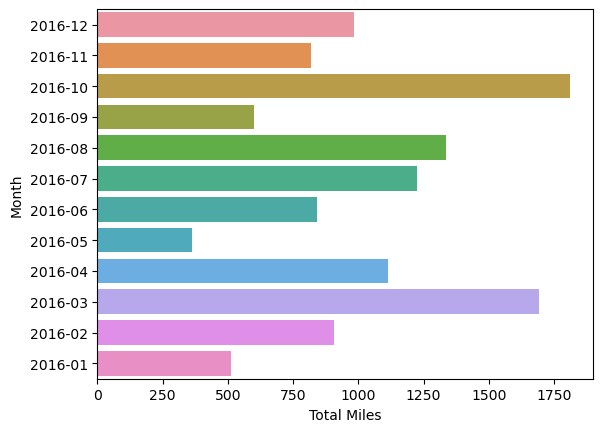

In [66]:
total_miles_per_month["MONTH"]=total_miles_per_month.index.tolist()
total_miles_per_month["MONTH"]=total_miles_per_month["MONTH"].astype(str)#converting the time stamp format to string
ax=sns.barplot(x="MILES*",y="MONTH",data=total_miles_per_month,order=total_miles_per_month.sort_values("MONTH",ascending=False)["MONTH"].tolist())
ax.set(xlabel="Total Miles",ylabel="Month")
plt.show()


In [67]:
g = nx.Graph()

In [68]:
g= nx.from_pandas_edgelist(rides,source='START*',target='STOP*',edge_attr=['Start_Date','Start_Time','End_Date','End_Time','CATEGORY*','MILES*','PURPOSE*'])



In [69]:
print(nx.info(g))

Graph with 209 nodes and 280 edges


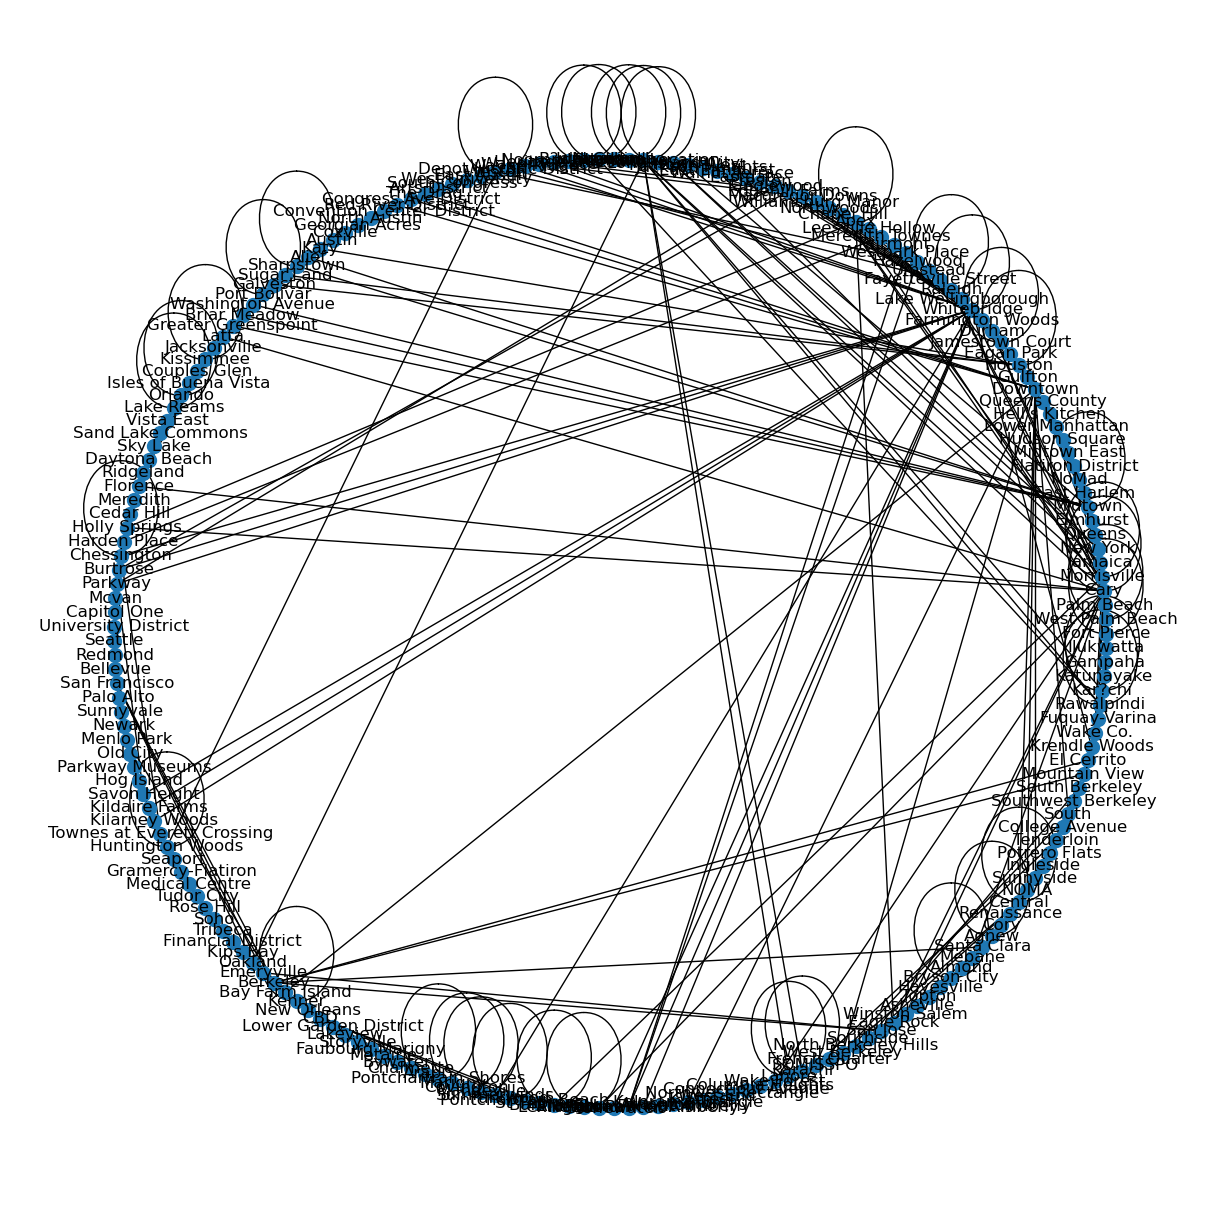

In [70]:
plt.figure(figsize=(12,12))
nx.draw_circular(g,with_labels=True,node_size=100)
plt.show()

In [71]:
#identifying which location is being visited more frequently (whether for pickup or dropoff)
location=[]
degree=[]
for node in g:
    location.append(node)
    degree.append(g.degree(node))

degree_dist_list = list (zip(location,degree))
degree_dist = pd.DataFrame(degree_dist_list, columns=['Location','Degree'])
degree_dist.sort_index(ascending=False)

,Location,Degree
208,Ilukwatta,1
207,Gampaha,2
206,Katunayake,1
205,Kar?chi,3
204,Rawalpindi,4
...,...,...
4,Morrisville,9
3,Cary,18
2,Palm Beach,1
1,West Palm Beach,4


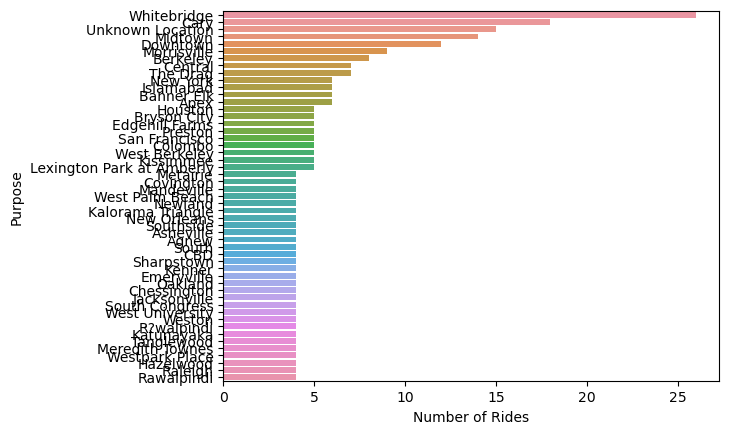

<Figure size 3000x2000 with 0 Axes>

In [72]:
#plotting locations that were visited at least 4 times.
ax = sns.barplot(x='Degree',y='Location',data=degree_dist[degree_dist['Degree']>=4],order=degree_dist[degree_dist['Degree']>=4].sort_values('Degree',ascending=False)['Location'].tolist())
ax.set(xlabel='Number of Rides', ylabel='Purpose')
plt.figure(figsize=(30,20))
plt.show()

In [73]:
# since the highest number of rides were for meeting purposes,here I visualize this network of rides
g2=nx.Graph()
g2 = nx.from_pandas_edgelist(rides[rides['PURPOSE*']=='Meeting'],source='START*',target='STOP*')



Graph with 83 nodes and 71 edges


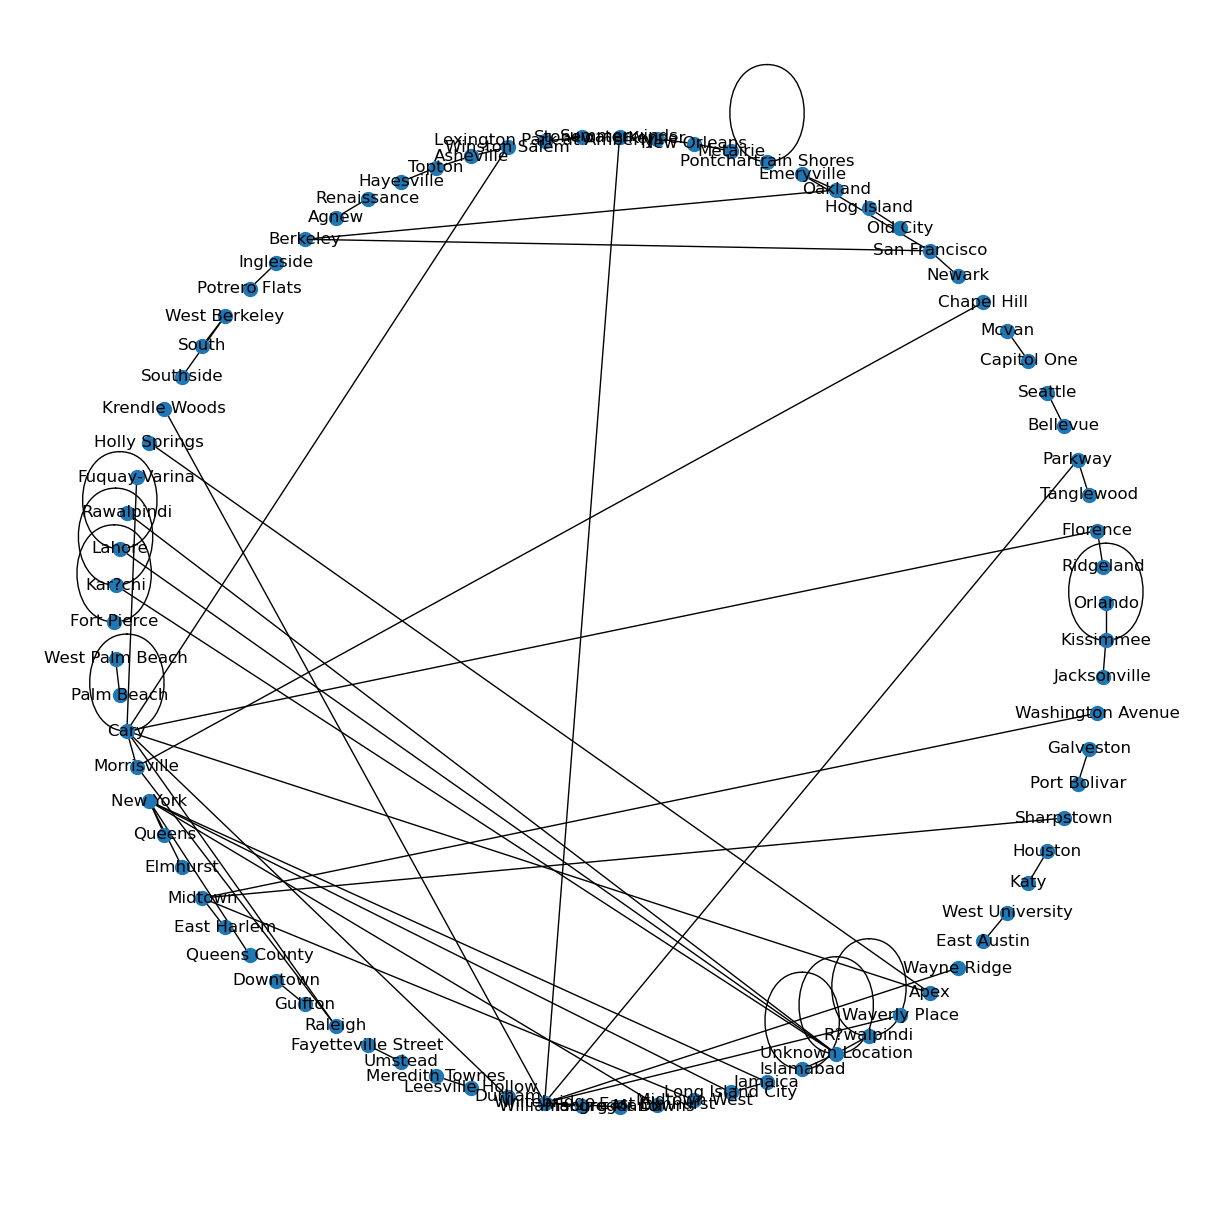

In [74]:
print(nx.info(g2))
plt.figure(figsize=(12,12))
nx.draw_shell(g2,with_labels=True,node_size=100)
plt.show()

In [75]:
location_2=[]
degree_2=[]
for node in g2:
    location_2.append(node)
    degree_2.append(g.degree(node))
degree_dist_list_2=list(zip(location_2,degree_2))
degree_dist_2=pd.DataFrame(degree_dist_list_2,columns=["Location","Degree"])
degree_dist_2.sort_index(ascending=True)

,Location,Degree
0,Fort Pierce,3
1,West Palm Beach,4
2,Palm Beach,1
3,Cary,18
4,Morrisville,9
...,...,...
78,Holly Springs,2
79,Fuquay-Varina,1
80,Rawalpindi,4
81,Lahore,3
